## Classification Algorithim and Model Evaluation

In this notebook, we will cover  
   
      
      
- Logistic Regression
- Confusion Matrix   
- Precision, Recall, Accuracy, F1 Score   
- ROC AUC Curve   
- Deciding Binary Classifier threshold

In [1]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv('Titanic_train_Clean.csv')

In [3]:
data.drop(['Fsize'],axis=1,inplace=True)

In [4]:
df=data.copy()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Group_size,Fare_Cat,Age_Cat
0,1,0,3,male,1,0,S,Mr,couple,1-10,15-30
1,2,1,1,female,1,0,C,Mrs,couple,70-100,30-45
2,3,1,3,female,0,0,S,Miss,solo,1-10,15-30
3,4,1,1,female,1,0,S,Mrs,couple,40-70,30-45
4,5,0,3,male,0,0,S,Mr,solo,1-10,30-45


### One Hot encoding for catagorial variables

In [6]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','Group_size','Fare_Cat','Age_Cat'],dtype=int)
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Fare_Cat_10-25,Fare_Cat_100+,Fare_Cat_25-40,Fare_Cat_40-70,Fare_Cat_70-100,Age_Cat_0-15,Age_Cat_15-30,Age_Cat_30-45,Age_Cat_45-60,Age_Cat_60+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df=df_OneHot.copy()

### Creating Independant And Dependant Variables

In [8]:
X=df.drop(['PassengerId','Survived'],axis=1)
Y=df['Survived']

### Train Test and Split the data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.3, random_state=25,shuffle=True)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


In [11]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Fare_Cat_10-25,Fare_Cat_100+,Fare_Cat_25-40,Fare_Cat_40-70,Fare_Cat_70-100,Age_Cat_0-15,Age_Cat_15-30,Age_Cat_30-45,Age_Cat_45-60,Age_Cat_60+
707,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
246,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
624,0,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
96,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
576,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [12]:
ytrain.head()

707    1
246    0
624    0
96     0
576    1
Name: Survived, dtype: int64

## Baseline Model
- ###  Dummy Classifier

In [72]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

In [48]:
dummy=DummyClassifier(strategy='most_frequent')

In [49]:
dummy.fit(xtrain,ytrain)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [52]:
dummy_predict=dummy.predict(xtest)

In [ ]:
print(classification_report(ytest,dummy_predict))

In [ ]:
acc=accuracy_score(ytest,dummy_predict)
precision=precision_score(ytest,dummy_predict)
recall=recall_score(ytest,dummy_predict)
f1_score=f1_score(ytest,dummy_predict)

In [75]:
print('The Accuracy Of dummy classifier is : ', acc)
print('The Precision of Dummy Classifier is : ' , precision)
print('The Recall score of Dummy Classifier is :', recall)
print('The F1 score of dummy classifier is : ' , f1_score)


The Accuracy Of dummy classifier is :  0.6156716417910447
The Precision of Dummy Classifier is :  0.0
The Recall score of Dummy Classifier is : 0.0
The F1 score of dummy classifier is :  0.0


### Changing Strategies To see results

In [71]:
for s in ["most_frequent","stratified","uniform"]:
    d = DummyClassifier(strategy=s)
    d.fit(xtrain,ytrain)
    d=d.predict(xtest)
    print(classification_report(ytest, d))
    print(f'The accuracy for strategy = {s} is \n',accuracy_score(ytest,d))
    

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       165
           1       0.00      0.00      0.00       103

    accuracy                           0.62       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.38      0.62      0.47       268

The accuracy for strategy = most_frequent is 
 0.6156716417910447
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       165
           1       0.47      0.45      0.46       103

    accuracy                           0.59       268
   macro avg       0.57      0.57      0.57       268
weighted avg       0.59      0.59      0.59       268

The accuracy for strategy = stratified is 
 0.5932835820895522
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       165
           1       0.43      0.54      0.48       103

    accuracy                           0.54       268

c:\Users\aliah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aliah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aliah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Here Most_frequent strategy gave us highest accuracy but worst recall which is clear sign of data imbalance

In [58]:
print('The confusion Metrics of dummy Score are \n', confusion_matrix(ytest,dummy_predict))

The confusion Metrics of dummy Score are 
 [[165   0]
 [103   0]]


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model=LogisticRegression(random_state=25)

In [15]:
lr_model.fit(xtrain,ytrain)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",25
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

### Evaluation

In [16]:
pred=lr_model.predict(xtest)

In [17]:
pred[0:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 1])

In [18]:
pred_prob=lr_model.predict_proba(xtest)

In [19]:
pred_prob[0:9,0:9]

array([[0.92391069, 0.07608931],
       [0.86246644, 0.13753356],
       [0.99287564, 0.00712436],
       [0.65785386, 0.34214614],
       [0.86246644, 0.13753356],
       [0.78578273, 0.21421727],
       [0.89509506, 0.10490494],
       [0.99193562, 0.00806438],
       [0.31619715, 0.68380285]])

First Value in the above array is the probability of 0(not survived ) and second column is the probability of 1 (survived)

### Comparison of Predicted Vs Actual

In [ ]:
xtest.head()

In [21]:
lr_pred_prb=lr_model.predict_proba(xtest)[:,1]# i only needed probability of 1 (survival)

In [ ]:
xt=xtest.copy()
xt['pred']=pred
xt['pred_probability']=lr_pred_prb# i only needed probability of 1 (survival)
xt['actual']=ytest
xt.head(20)


### Confusion Metrics

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(ytest, pred)

array([[145,  20],
       [ 33,  70]])

        

[True Negatives , False Positive] =  [145,  20]   
[ False Negatives,  True Positives]= [ 33,  70]

In [25]:
confusion_matrix(ytest,pred).ravel()

array([145,  20,  33,  70])

In [26]:
# Tuple Unpacking: Alloting values in tuple to  a certain variable
tn , fp , fn, tp=confusion_matrix(ytest,pred).ravel()

In [27]:
conf_matrix=pd.DataFrame({'pred_Survived':[tp,fp], 
                          'pred_Not Survived':[fn,tn]},index=['Survived','Not Survived'])

In [28]:
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,33
Not Survived,20,145


### Accuracy

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy=accuracy_score(ytest,pred)
print("The Accuracy is " , (accuracy))

The Accuracy is  0.8022388059701493


## Precision

In [31]:
from sklearn.metrics import precision_score

In [78]:
precision_1=precision_score(ytest,pred)
precision_O=precision_score(ytest,pred,pos_label=0) # Precision For Not survived

print('The Precision For positive class/Survived is ', precision)
print('The Precision for negative class/Not survived', precision_O)



The Precision For positive class/Survived is  0.0
The Precision for negative class/Not survived 0.8146067415730337


## Recall

In [33]:
from sklearn.metrics import recall_score

In [34]:
recall_1=recall_score(ytest,pred)
recall_O=recall_score(ytest,pred,pos_label=0)

print('The Recall score for positive class/Survived is  ', recall_1)
print('The Recall score for negative class/Not Survived is  ', recall_O)


The Recall score for positive class/Survived is   0.6796116504854369
The Recall score for negative class/Not Survived is   0.8787878787878788


## F1 Score

In [35]:
from sklearn.metrics import f1_score

In [36]:
f1=f1_score(ytest,pred,)
f1_O=f1_score(ytest,pred,pos_label=0)
print('The F1 Score of positive class/Survived is ',f1)
print('The F1 Score of negative class/ NotSurvived is ',f1_O)

The F1 Score of positive class/Survived is  0.7253886010362695
The F1 Score of negative class/ NotSurvived is  0.8454810495626822


## Classification Report
There is an another way of calculating all the the confusion metrics Which is just import ``classification_repost`` It will calculate all the confusion metrics for you

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       165
           1       0.78      0.68      0.73       103

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



### Comparison Of Accuracy, Precision , recall , and F1 score of ``LogisticRegression`` and ``DummyClassifier``

In [81]:
comparison=pd.DataFrame({'Accuracy': [acc,accuracy],
                         'Precision':[precision,precision_1],
                         'Recall':[recall,recall_1],
                         'F1_Score':[f1_score,f1]},index=['Dummy Classifier','Logistic Regression'])

In [82]:
comparison

,Accuracy,Precision,Recall,F1_Score
Dummy Classifier,0.615672,0.000000,0.000000,0.000000
Logistic Regression,0.802239,0.777778,0.679612,0.725389


## Comparison

- Dummy Classifier is useful as a baseline, but cannot detect minority class.

- Logistic Regression outperforms dummy across all metrics and is able to learn patterns from data.

- This confirms that Logistic Regression is an effective and reliable model for predicting survival on the Titanic dataset.

## ROC AUC Curve
- RUC stands for **Reciever Operating Characteristics**   
- AUC stands for **Area Under Curve**

In [39]:
from sklearn.metrics import auc, roc_curve,roc_auc_score

In [40]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

In [41]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)

In [42]:
print(auc_lr)

0.8767284495439834


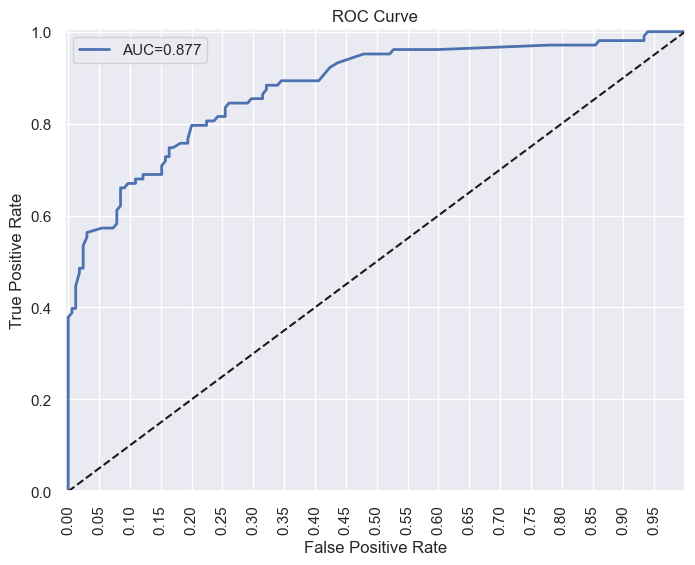

In [43]:
# Plotting AUC ROC Curve
plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.plot(fpr,tpr,lw=2,label='AUC=%0.3f'% auc_lr)
plt.plot([0,1],[0,1],'k--')
plt.axis([-0.005,1,0,1.005])
plt.xticks(np.arange(0,1,0.05),rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
sns.set_context('poster')


## Model Complexity

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
# acc_train=[]
# acc_test=[]
# for i in range(1,6):
#     poly_reg=PolynomialFeatures(degree=i)
#     x_tr_poly=poly_reg.fit_transform(xtrain)
#     x_tst_poly=poly_reg.fit_transform(xtest)
#     lr_poly=LogisticRegression(random_state=25,solver='saga')
#     lr_poly.fit(x_tr_poly,ytrain)
#     y_tr_predicted=lr_poly.predict(x_tr_poly)
#     y_tst_predicted=lr_poly.predict(x_tst_poly)

#     acc_train.append(accuracy_score(ytrain,y_tr_predicted))
#     acc_test.append(accuracy_score(ytest,y_tst_predicted))

In [46]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.lineplot(x=list(range(1,6)),y=acc_train,label='Training')
sns.lineplot(x=list(range(1,6)),y=acc_test,label='Testing')
plt.legend()


NameError: name 'acc_train' is not defined

<Figure size 1800x500 with 0 Axes>